Task 1

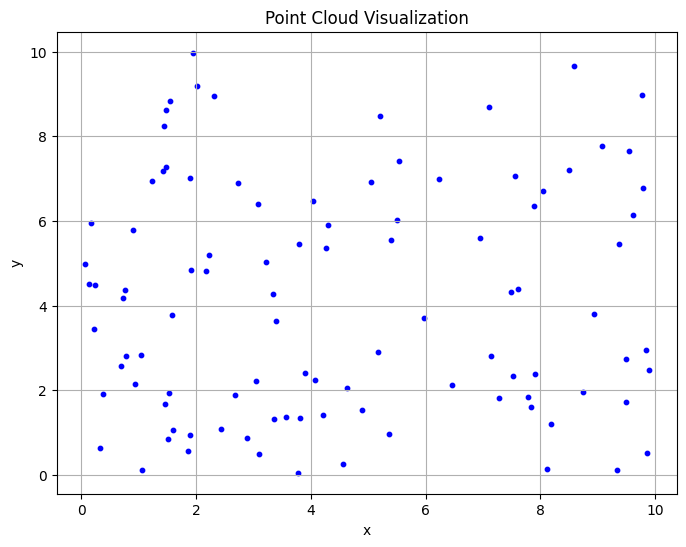

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('mesh.dat', skiprows=1)


x = data[:, 0]
y = data[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=10, c='blue', marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Point Cloud Visualization')
plt.grid(True)
plt.show()


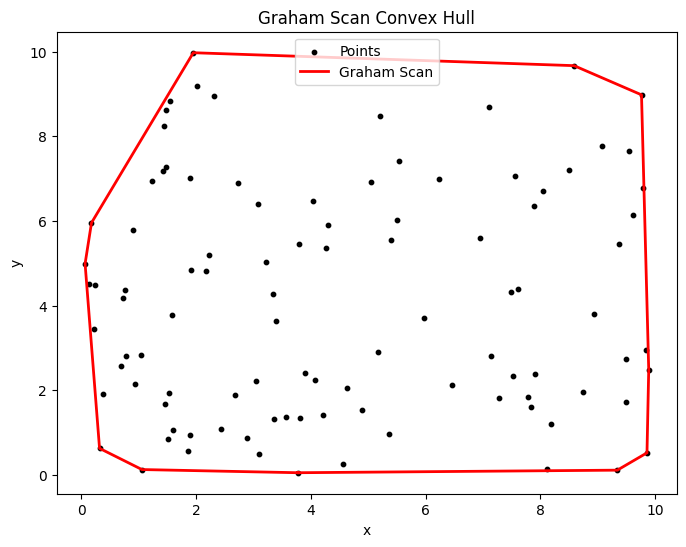

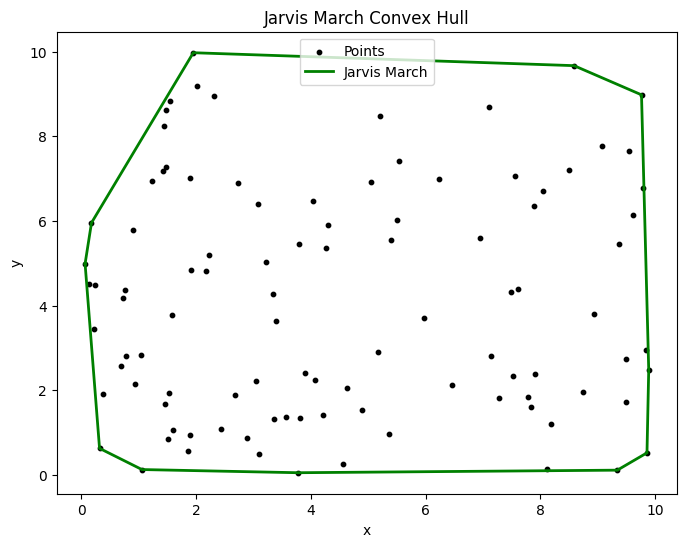

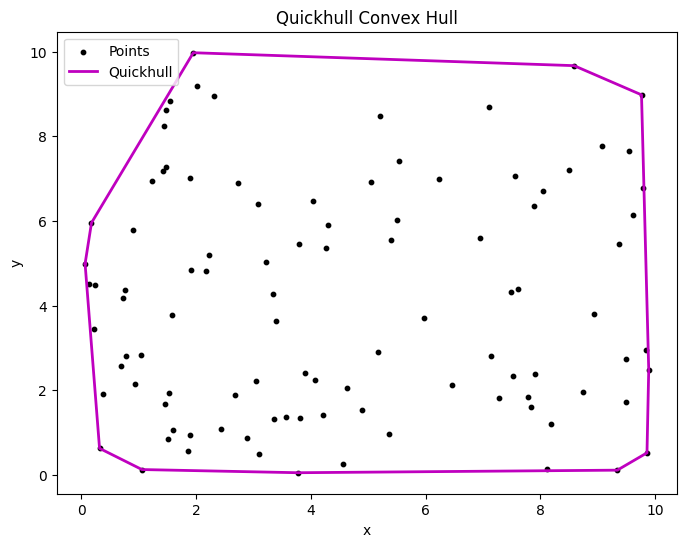

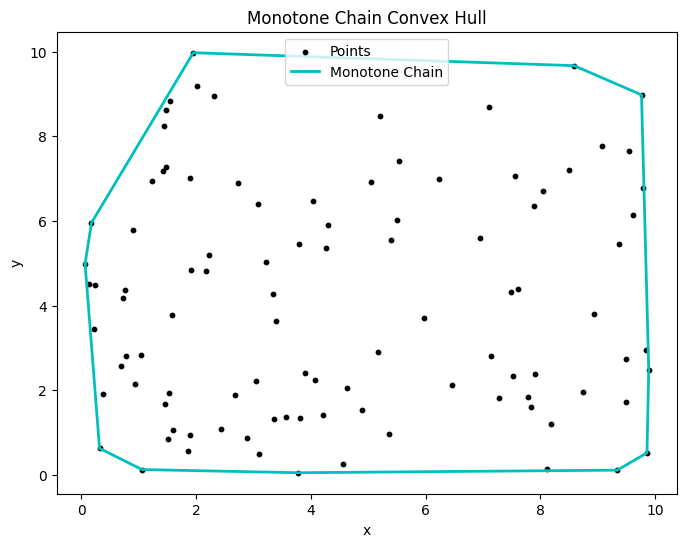

In [ ]:
# b) & c)

def cross(o, a, b):
    return (a[0]-o[0])*(b[1]-o[1]) - (a[1]-o[1])*(b[0]-o[0])

def graham_scan(points):
    pts = np.array(points)
    pivot = pts[np.lexsort((pts[:,0], pts[:,1]))][0]
    def polar_angle(p):
        return np.arctan2(p[1]-pivot[1], p[0]-pivot[0])
    sorted_pts = sorted(pts, key=polar_angle)
    hull = []
    for p in sorted_pts:
        while len(hull) >= 2 and cross(hull[-2], hull[-1], p) <= 0:
            hull.pop()
        hull.append(p)
    return np.array(hull)

def jarvis_march(points):
    pts = np.array(points)
    n = len(pts)
    if n < 3:
        return pts
    leftmost = np.argmin(pts[:,0])
    hull = []
    p = leftmost
    while True:
        hull.append(pts[p])
        q = (p + 1) % n
        for r in range(n):
            if cross(pts[p], pts[r], pts[q]) > 0:
                q = r
        p = q
        if p == leftmost:
            break
    return np.array(hull)

def quickhull(points):
    pts = np.array(points)
    n = len(pts)
    if n < 3:
        return pts
    min_pt = pts[np.argmin(pts[:,0])]
    max_pt = pts[np.argmax(pts[:,0])]
    def find_hull(pts, A, B):
        if len(pts) == 0:
            return []
        distances = np.array([abs(cross(A, B, p)) for p in pts])
        idx = np.argmax(distances)
        C = pts[idx]
        left_of_AC = [p for p in pts if cross(A, C, p) > 0]
        left_of_CB = [p for p in pts if cross(C, B, p) > 0]
        return find_hull(np.array(left_of_AC), A, C) + [C] + find_hull(np.array(left_of_CB), C, B)
    left_set = [p for p in pts if cross(min_pt, max_pt, p) > 0]
    right_set = [p for p in pts if cross(max_pt, min_pt, p) > 0]
    left_hull = find_hull(np.array(left_set), min_pt, max_pt)
    right_hull = find_hull(np.array(right_set), max_pt, min_pt)
    hull = [min_pt] + left_hull + [max_pt] + right_hull
    return np.array(hull)

def monotone_chain(points):
    pts = sorted(points, key=lambda p: (p[0], p[1]))
    if len(pts) <= 1:
        return np.array(pts)
    lower = []
    for p in pts:
        while len(lower) >= 2 and cross(lower[-2], lower[-1], p) <= 0:
            lower.pop()
        lower.append(p)
    upper = []
    for p in reversed(pts):
        while len(upper) >= 2 and cross(upper[-2], upper[-1], p) <= 0:
            upper.pop()
        upper.append(p)
    hull = lower[:-1] + upper[:-1]
    return np.array(hull)

data = np.loadtxt('mesh.dat', skiprows=1)
hull_graham = graham_scan(data)
hull_jarvis = jarvis_march(data)
hull_quick = quickhull(data)
hull_monotone = monotone_chain(data)

algorithms = [
    ('Graham Scan', hull_graham, 'r-'),
    ('Jarvis March', hull_jarvis, 'g-'),
    ('Quickhull', hull_quick, 'm-'),
    ('Monotone Chain', hull_monotone, 'c-')
]

for (name, hull, color) in algorithms:
    plt.figure(figsize=(8,6))
    plt.scatter(data[:,0], data[:,1], s=10, c='black', label='Points')
    hull_closed = np.vstack([hull, hull[0]])
    plt.plot(hull_closed[:,0], hull_closed[:,1], color, lw=2, label=name)
    plt.legend()
    plt.title(name + " Convex Hull")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()


Task 2

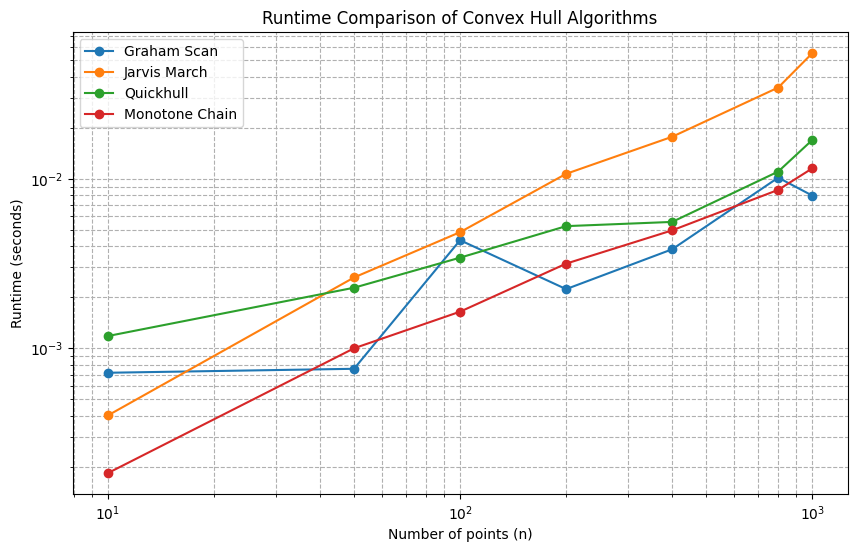

In [ ]:
# a) & b)
import time

def generate_point_cloud(n):
    return np.random.rand(n, 2)

ns = [10, 50, 100, 200, 400, 800, 1000]


algorithms = {
    "Graham Scan": graham_scan,
    "Jarvis March": jarvis_march,
    "Quickhull": quickhull,
    "Monotone Chain": monotone_chain
}


runtime_results = {name: [] for name in algorithms.keys()}

np.random.seed(42)  

for n in ns:
    points = generate_point_cloud(n)
    for name, func in algorithms.items():
        start_time = time.perf_counter()
        hull = func(points)
        end_time = time.perf_counter()
        runtime_results[name].append(end_time - start_time)

plt.figure(figsize=(10, 6))
for name, runtimes in runtime_results.items():
    plt.plot(ns, runtimes, marker='o', label=name)
plt.xlabel("Number of points (n)")
plt.ylabel("Runtime (seconds)")
plt.title("Runtime Comparison of Convex Hull Algorithms")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

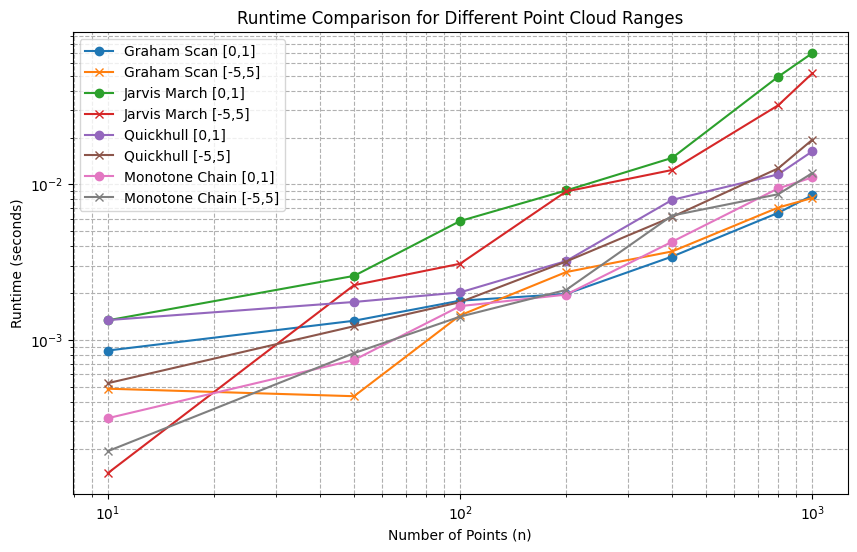

In [ ]:
# c)

def generate_point_cloud(n):
    return np.random.rand(n, 2)

def generate_point_cloud_range(n, low, high):
    return np.random.uniform(low, high, (n, 2))

# (Assume the following functions are already defined and imported)
# graham_scan(points)
# jarvis_march(points)
# quickhull(points)
# monotone_chain(points)

ns = [10, 50, 100, 200, 400, 800, 1000]
algorithms = {
    "Graham Scan": graham_scan,
    "Jarvis March": jarvis_march,
    "Quickhull": quickhull,
    "Monotone Chain": monotone_chain
}

runtime_results_range1 = {name: [] for name in algorithms.keys()}
runtime_results_range2 = {name: [] for name in algorithms.keys()}

np.random.seed(42)
for n in ns:
    points1 = generate_point_cloud(n)
    points2 = generate_point_cloud_range(n, -5, 5)
    for name, func in algorithms.items():
        start = time.perf_counter()
        func(points1)
        end = time.perf_counter()
        runtime_results_range1[name].append(end - start)
        
        start = time.perf_counter()
        func(points2)
        end = time.perf_counter()
        runtime_results_range2[name].append(end - start)

plt.figure(figsize=(10,6))
for name in algorithms.keys():
    plt.plot(ns, runtime_results_range1[name], marker='o', label=f"{name} [0,1]")
    plt.plot(ns, runtime_results_range2[name], marker='x', label=f"{name} [-5,5]")
plt.xlabel("Number of Points (n)")
plt.ylabel("Runtime (seconds)")
plt.title("Runtime Comparison for Different Point Cloud Ranges")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

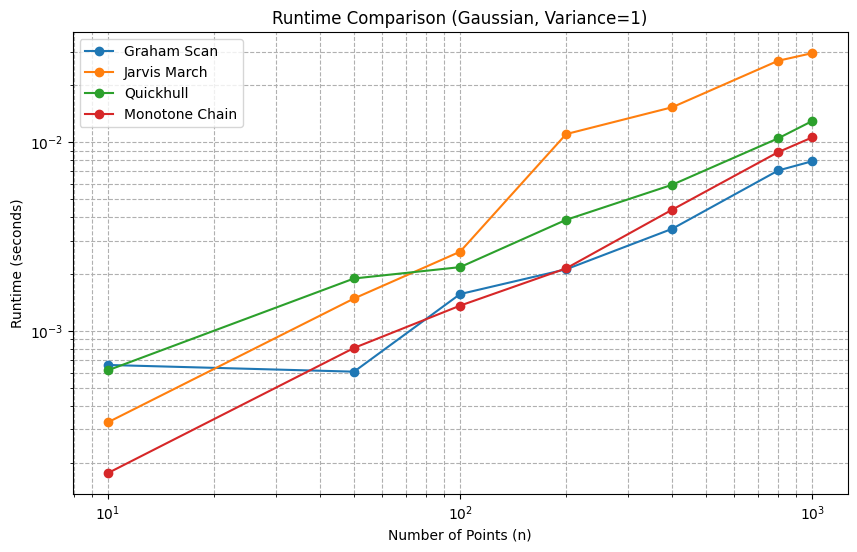

In [ ]:
# d) 

import numpy as np
import matplotlib.pyplot as plt
import time

def generate_gaussian_point_cloud(n):
    return np.random.normal(0, 1, (n, 2))

ns = [10, 50, 100, 200, 400, 800, 1000]

algorithms = {
    "Graham Scan": graham_scan,
    "Jarvis March": jarvis_march,
    "Quickhull": quickhull,
    "Monotone Chain": monotone_chain
}

runtime_results = {name: [] for name in algorithms.keys()}

np.random.seed(42)

for n in ns:
    points = generate_gaussian_point_cloud(n)
    for name, func in algorithms.items():
        start = time.perf_counter()
        _ = func(points)
        end = time.perf_counter()
        runtime_results[name].append(end - start)

plt.figure(figsize=(10,6))
for name, runtimes in runtime_results.items():
    plt.plot(ns, runtimes, marker='o', label=name)
plt.xlabel("Number of Points (n)")
plt.ylabel("Runtime (seconds)")
plt.title("Runtime Comparison (Gaussian, Variance=1)")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

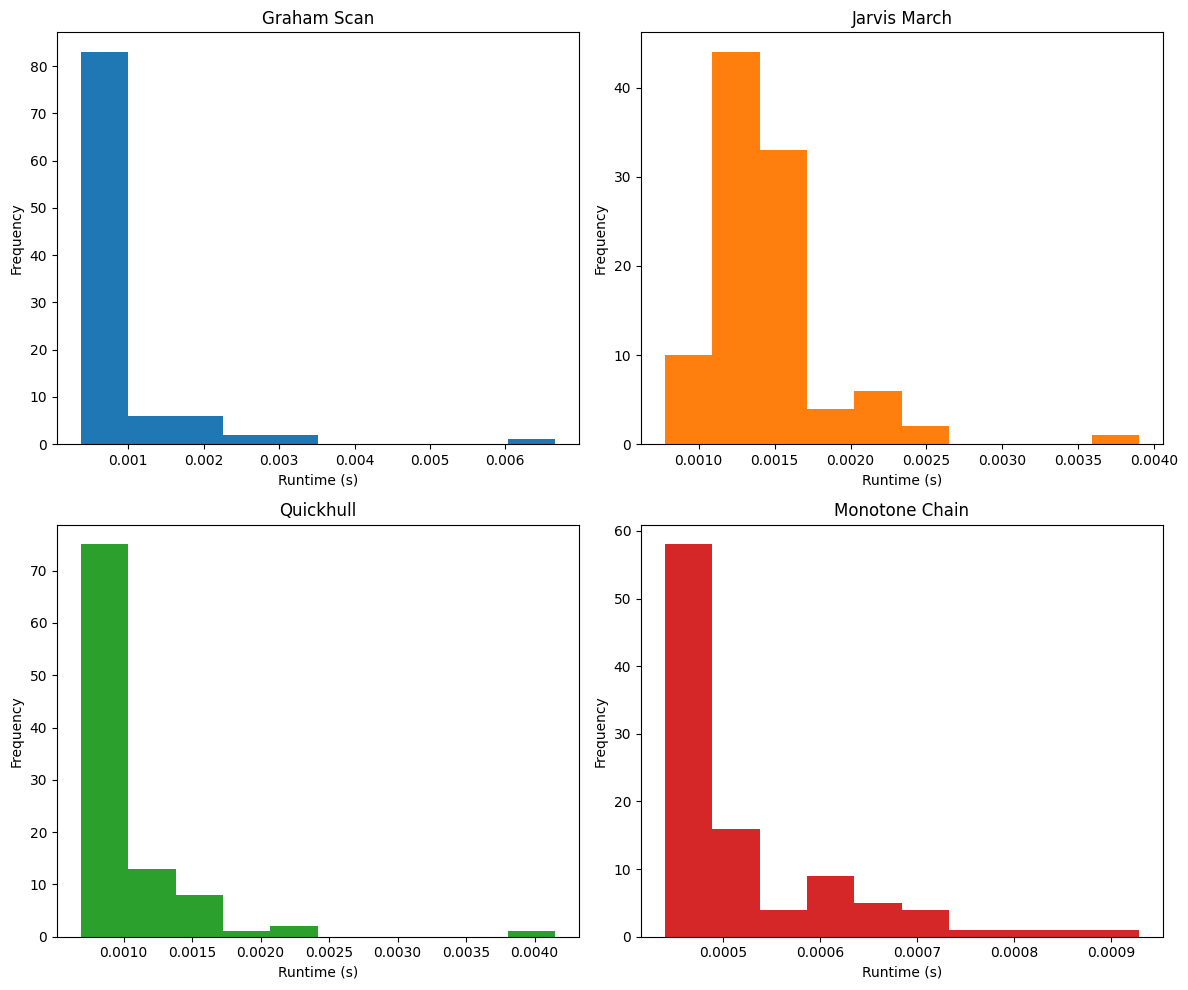

In [ ]:
# d)

def generate_point_cloud(n):
    return np.random.rand(n, 2)

nsamples = 100
n = 50
algorithms = {
    "Graham Scan": graham_scan,
    "Jarvis March": jarvis_march,
    "Quickhull": quickhull,
    "Monotone Chain": monotone_chain
}
runtime_results = {name: [] for name in algorithms}
np.random.seed(42)
for i in range(nsamples):
    points = generate_point_cloud(n)
    for name, func in algorithms.items():
        start = time.perf_counter()
        _ = func(points)
        end = time.perf_counter()
        runtime_results[name].append(end - start)

fig, axs = plt.subplots(2, 2, figsize=(12,10))
axs = axs.ravel()
for i, (name, runtimes) in enumerate(runtime_results.items()):
    axs[i].hist(runtimes, bins=10, color=f"C{i}")
    axs[i].set_title(name)
    axs[i].set_xlabel("Runtime (s)")
    axs[i].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

conclusion_lines = []
for name, runtimes in runtime_results.items():
    best = min(runtimes)
    worst = max(runtimes)
    conclusion_lines.append(f"{name}: Best = {best:.3e} s, Worst = {worst:.3e} s")
conclusion_lines.append("The runtime distributions for n=50 appear approximately normal, "
"indicating that the variations are largely due to measurement noise rather "
"than changes in the point cloud variance.")
with open("conclusion_hist.txt", "w") as f:
    f.write("\n".join(conclusion_lines))


Delaunay Triangulation in 3D

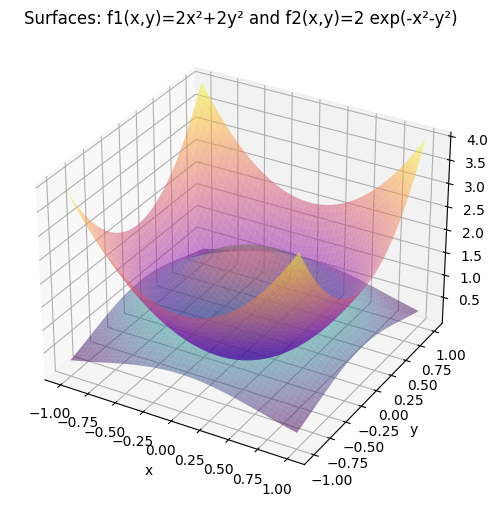

In [ ]:
# a)
from mpl_toolkits.mplot3d import Axes3D

def surface1(x, y):
    return 2*x**2 + 2*y**2

def surface2(x, y):
    return 2*np.exp(-x**2 - y**2)

x = np.linspace(-1, 1, 200)
y = np.linspace(-1, 1, 200)
X, Y = np.meshgrid(x, y)

Z1 = surface1(X, Y)
Z2 = surface2(X, Y)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

surf1 = ax.plot_surface(X, Y, Z1, alpha=0.5, cmap='plasma')
surf2 = ax.plot_surface(X, Y, Z2, alpha=0.5, cmap='viridis')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("Surfaces: f1(x,y)=2x²+2y² and f2(x,y)=2 exp(-x²-y²)")
plt.show()


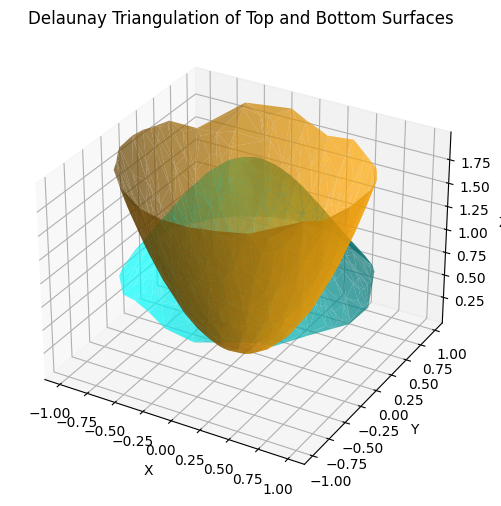

In [ ]:
# b)

from scipy.spatial import Delaunay

def surface1(x, y):
    return 2*x**2 + 2*y**2

def surface2(x, y):
    return 2*np.exp(-x**2 - y**2)

def generate_top_points(n_samples=500, r=1.0):
    pts = []
    np.random.seed(42)
    while len(pts) < n_samples:
        x = np.random.uniform(-r, r)
        y = np.random.uniform(-r, r)
        if x*x + y*y <= r*r:
            z = surface2(x, y)
            pts.append([x, y, z])
    return np.array(pts)

def generate_bottom_points(n_samples=500, r=1.0):
    pts = []
    np.random.seed(123)
    while len(pts) < n_samples:
        x = np.random.uniform(-r, r)
        y = np.random.uniform(-r, r)
        if x*x + y*y <= r*r:
            z = surface1(x, y)
            pts.append([x, y, z])
    return np.array(pts)

top_points = generate_top_points(n_samples=500, r=1.0)
bottom_points = generate_bottom_points(n_samples=500, r=1.0)

tri_top = Delaunay(top_points[:, :2])

tri_bottom = Delaunay(bottom_points[:, :2])

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(
    top_points[:,0],
    top_points[:,1],
    top_points[:,2],
    triangles=tri_top.simplices,
    color='cyan',
    alpha=0.7,
    edgecolor='none',
    label='Top Surface'
)


ax.plot_trisurf(
    bottom_points[:,0],
    bottom_points[:,1],
    bottom_points[:,2],
    triangles=tri_bottom.simplices,
    color='orange',
    alpha=0.7,
    edgecolor='none',
    label='Bottom Surface'
)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Delaunay Triangulation of Top and Bottom Surfaces')
plt.show()


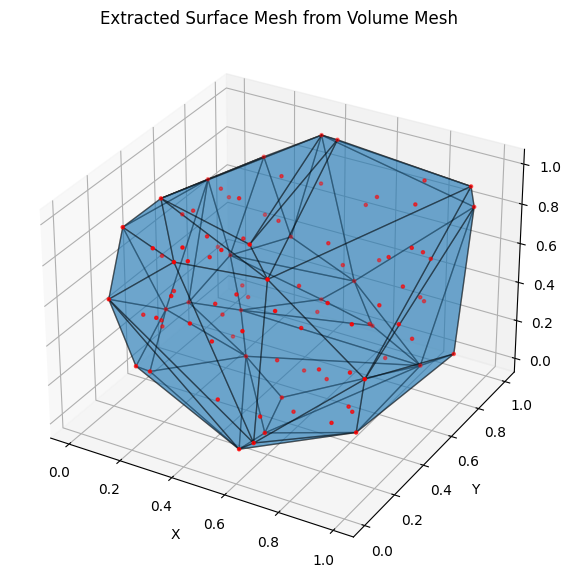

In [ ]:
# c)
from scipy.spatial import Delaunay
from collections import Counter


np.random.seed(42)
points = np.random.rand(100, 3)


tri = Delaunay(points)


faces = []
for tet in tri.simplices:
    faces.append(tuple(sorted([tet[0], tet[1], tet[2]])))
    faces.append(tuple(sorted([tet[0], tet[1], tet[3]])))
    faces.append(tuple(sorted([tet[0], tet[2], tet[3]])))
    faces.append(tuple(sorted([tet[1], tet[2], tet[3]])))

face_count = Counter(faces)

boundary_faces = [face for face, count in face_count.items() if count == 1]

surface_triangles = np.array([[points[i] for i in face] for face in boundary_faces])

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.add_collection3d(Poly3DCollection(surface_triangles, alpha=0.4, edgecolor="k"))

ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='r', s=5)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Extracted Surface Mesh from Volume Mesh")
plt.show()


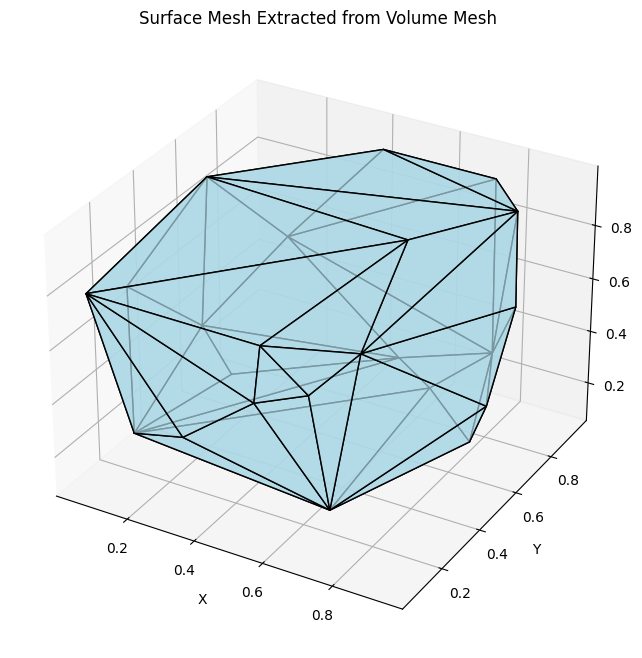

In [6]:
# d)

from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from collections import defaultdict

np.random.seed(0)
points = np.random.rand(50, 3)
tri = Delaunay(points)

def get_boundary_faces(tets):
    face_count = defaultdict(int)
    for tet in tets:
        faces = [
            tuple(sorted([tet[0], tet[1], tet[2]])),
            tuple(sorted([tet[0], tet[1], tet[3]])),
            tuple(sorted([tet[0], tet[2], tet[3]])),
            tuple(sorted([tet[1], tet[2], tet[3]]))
        ]
        for face in faces:
            face_count[face] += 1
    return [face for face, count in face_count.items() if count == 1]

boundary_faces = get_boundary_faces(tri.simplices)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
triangles = [points[list(face)] for face in boundary_faces]
poly3d = Poly3DCollection(triangles, facecolor='lightblue', edgecolor='k', alpha=0.7)
ax.add_collection3d(poly3d)
ax.set_xlim(points[:, 0].min(), points[:, 0].max())
ax.set_ylim(points[:, 1].min(), points[:, 1].max())
ax.set_zlim(points[:, 2].min(), points[:, 2].max())
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Surface Mesh Extracted from Volume Mesh')
plt.show()
